In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os 
import re 
import sys
from distutils.dir_util import copy_tree

import subprocess
import json

import subprocess
import time

# cwd = os.getcwd()
# cwd = r'C:\Users\Laxman\Desktop\woodSDATool_Eusef'
cwd = r'/Users/laxmandahal/Desktop/UCLA/Phd/Research/woodSDA/woodSDATool_Eusef'

sys.path.append(os.path.join(cwd, *['Codes','DesignTool']))
sys.path.append(os.path.join(cwd, *['Codes','ModelingTool']))
sys.path.append(os.path.join(cwd, *['Codes', 'PostProcessing']))

####################### Modules required for Design Tool ##################
from FinalShearWallDesign_allFloors import FinalShearWallDesign
from StiffnessBasedDesign import RDADesignIterationClass

####################### Modules required for OpenSees Modeling ##################
# os.chdir(os.path.join(cwd, *['Codes','ModelingTool']))
from BuildingModelClass import BuildingModel
from utils import *

####################### Modules required for Post-Processing ##################
import ExtractMaxEDP as extractedps
import ExtractPushoverData as epd
import csv
import math

####################### Modules required for Loss Assessment ##################
# and import pelicun classes and methods
# from pelicun.base import set_options, convert_to_MultiIndex
# from pelicun.assessment import Assessment

# pd.set_option('display.max_colwidth', 100)
%load_ext autoreload
%autoreload 2

In [14]:
# !pip install pelicun==3.1.b6

### setting up directories and folders to store the building models

In [3]:
# Utility function directory 
UtilDirectory = os.path.join(cwd, *['Codes','ModelingTool'])
# Base directory is the main directory that models, model inputs and utility directory stores
BaseDirectory = cwd
# Model directory is where you want to store your model
ModelDirectory = os.path.join(cwd, 'BuildingModels')
# DB directory is where you store Database.csv (for steel section)
DBDirecctory = UtilDirectory

# If there is no model directory, create one
if os.path.isdir(ModelDirectory) != True:
    os.chdir(BaseDirectory)
    os.mkdir('BuildingModels')

## create a directory to story results
resultDirectory = os.path.join(cwd, 'Results')
if os.path.isdir(resultDirectory) != True:
    os.chdir(cwd)
    os.mkdir('Results')
    
# Read in building name(s) 
# Make sure the building name is consistent with the input folders
os.chdir(os.path.join(cwd, 'Codes'))
with open('BuildingNames_woodSDATest.txt', 'r') as f:
    BuildingList = f.read() 
BuildingList = BuildingList.split('\n')
BuildingList

['s4_96x48']

## Implement design module

No need to post-process the outputs of design module. The modeling module is able to read in the required inputs from design module's output

In [4]:
start = time.time()
# caseID = 'woodSDATestModel'
caseID = BuildingList[0]
basedirectory = os.path.join(cwd, *['BuildingInfo', caseID])
numFloors = 4
# direction = ['X', 'X', 'Y', 'Y', 'Y']
# wall_line_name = ['sw1', 'sw2', 'swA', 'swB', 'swC']
# numWallsPerLine = [2,2,2,2,2]
 
direction = ['X', 'X', 'X', 
             'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y']
wall_line_name = ['gridA', 'gridB', 'gridC',
                  'grid1', 'grid2','grid3','grid4','grid5','grid6', 'grid7']
numWallsPerLine = [4, 4, 4,
                  2, 2, 4, 2, 4, 2, 2]
counter = 0

rda = RDADesignIterationClass(caseID, basedirectory, direction,numWallsPerLine, counter, wall_line_name,
                              weight_factor=1, seismic_design_level='Extreme', mat_ext_int='HWS_GWB')

# rda.maindf
# rda.maindf.to_csv(os.path.join(resultDirectory, "FinalDesignOutput.csv"))
stop = time.time()
print( stop - start, 'seconds')

14.981001615524292 seconds


In [5]:
rda.maindf

D/C Ratio  Drift(in)  Ga(k/in)  LRFD(klf)  \
swDesign_gridA_wall1 0   0.809222   1.183003       5.2      0.160   
                     1   0.714019   0.812688      19.0      0.544   
                     2   0.952026   0.901774      32.0      0.816   
                     3   0.894849   0.921743      52.0      1.232   
swDesign_gridA_wall2 0   0.809368   1.141859       5.2      0.160   
                     1   0.714148   0.753511      19.0      0.544   
                     2   0.952197   0.809624      32.0      0.816   
                     3   0.895010   0.772880      52.0      1.232   
swDesign_gridA_wall3 0   0.809368   1.141859       5.2      0.160   
                     1   0.714148   0.753511      19.0      0.544   
                     2   0.952197   0.809624      32.0      0.816   
                     3   0.895010   0.772880      52.0      1.232   
swDesign_gridA_wall4 0   0.809222   1.183003       5.2      0.160   
                     1   0.714019   0.812688      19.0      0.544   
                     2   0.952026   0.901774      32.0      0.816   
                     3   0.894849   0.921743      52.0      1.232   
swDesign_gridB_wall1 0   0.840421   1.094490       5.2      0.160   
                     1   0.741548   0.651643      19.0      0.544   
                     2   0.988730   0.612313      32.0      0.816   
                     3   0.929349   0.473247      52.0      1.232   
swDesign_gridB_wall2 0   0.840438   1.085622       5.2      0.160   
                     1   0.741563   0.639006      19.0      0.544   
                     2   0.988750   0.596332      32.0      0.816   
                     3   0.929368   0.441695      52.0      1.232   
swDesign_gridB_wall3 0   0.840421   1.094490       5.2      0.160   
                     1   0.741548   0.651643      19.0      0.544   
                     2   0.988730   0.612313      32.0      0.816   
                     3   0.929349   0.473247      52.0      1.232   
swDesign_gridB_wall4 0   0.840438   1.085622       5.2      0.160   
                     1   0.741563   0.639006      19.0      0.544   
...                           ...        ...       ...        ...   
swDesign_grid5_wall1 2   0.937244   0.669059      32.0      0.816   
                     3   0.880955   0.554763      52.0      1.232   
swDesign_grid5_wall2 0   0.796657   1.066283       5.2      0.160   
                     1   0.995822   0.802462      15.0      0.384   
                     2   0.937244   0.669059      32.0      0.816   
                     3   0.880955   0.554763      52.0      1.232   
swDesign_grid5_wall3 0   0.796657   1.066283       5.2      0.160   
                     1   0.995822   0.802462      15.0      0.384   
                     2   0.937244   0.669059      32.0      0.816   
                     3   0.880955   0.554763      52.0      1.232   
swDesign_grid5_wall4 0   0.796657   1.066283       5.2      0.160   
                     1   0.995822   0.802462      15.0      0.384   
                     2   0.937244   0.669059      32.0      0.816   
                     3   0.880955   0.554763      52.0      1.232   
swDesign_grid6_wall1 0   0.728373   1.178956       5.2      0.160   
                     1   0.910466   1.031290      15.0      0.384   
                     2   0.971163   1.143055      28.0      0.720   
                     3   0.805445   1.270957      52.0      1.232   
swDesign_grid6_wall2 0   0.728373   1.178956       5.2      0.160   
                     1   0.910466   1.031290      15.0      0.384   
                     2   0.971163   1.143055      28.0      0.720   
                     3   0.805445   1.270957      52.0      1.232   
swDesign_grid7_wall1 0   0.728373   1.178956       5.2      0.160   
                     1   0.910466   1.031290      15.0      0.384   
                     2   0.971163   1.143055      28.0      0.720   
                     3   0.805445   1.270957      52.0      1.232   
swDesign_grid7_wall2 0

In [6]:
import psutil;
print(psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2, 'MB memory required')


128.19921875 MB memory required


## Implement modeling module

The following code creates three sets of 3D OpenSees Models- Eigenvalue, pushover, and dyanmic analysis. The flag ___RunPushoverSwitch___ automatically runs the pushover analysis after creating the required tcl files.

In [7]:
start = time.time()

# Generate eigen analysis, pushover analysis and dynamic analysis models for each one in the building list
for i in range(0, len(BuildingList)):
    design_level = 'Extreme'
        
    InfoDirectory = os.path.join(BaseDirectory, *['BuildingInfo', '%s'%BuildingList[i]])
    ModelClass = BuildingModel(BuildingList[i], InfoDirectory, seismic_design_level = design_level)

    # alternatively, one can choose to read inputs from json 
    ModelClass.read_in_txt_inputs(BuildingList[i], InfoDirectory)

    if os.path.isdir(ModelDirectory+'/%s'%BuildingList[i]) != True:
        os.chdir(ModelDirectory)
        os.mkdir('%s'%BuildingList[i])
        
    os.chdir(ModelDirectory+'/%s'%BuildingList[i])
    period = generateModalAnalysisModel(ModelClass.ID, ModelClass, BaseDirectory, DBDirecctory)
    # Turn off RunPushoverSwitch to speed up the model creation 
    generatePushoverAnalysisModel(ModelClass.ID, ModelClass, BaseDirectory, DBDirecctory,
                               GenerateModelSwitch = True, RunPushoverSwitch = True)
    generateDynamicAnalysisModel(ModelClass.ID, ModelClass, BaseDirectory, DBDirecctory, period,
                               GenerateModelSwitch = True)
    print(period)
    print(BuildingList[i])

finish = time.time()
print((finish - start)/60, 'Minutes')

[0.7578038516504025, 0.5053044722199003, 0.4832850197414296, 0.28117104397436693]
s4_96x48
13.203144705295562 Minutes


### Run dynamic analysis 

Files required to run dynamic analysis has been created in the previous step, the following code iteratively runs the dynamic analysis upto the specified number of Ground motions.


In [16]:
### MSA using selected GM records for 5 hazard levels. Location: Boelter Hall
Scale_Sa_GM = '0.403 0.975 1.307 1.676 2.237'
GM_Num = '50 47 47 48 47'

# GM_ID = 1 # GM pair
GM_folder = r'GM_sets/BoelterHall'

Model_Name = BuildingList[0]


# start_ID is tarting index which starts from 1 instead of 0
# finish_ID is the total number of GMs in multiple stripe or incremental dynamic analysis
# for eg: if you have 10 hazard levels with 22 GM pairs, finish_id should be 10*22 + 1
start_ID, finish_ID = 1, 3 # for demonstration I'm running dynamic analysis for 2 ground motion pairs
acc_time = 0
start_time = time.time()

ModelDirectory = r'C:\Users\Laxman\Desktop\woodSDATool_Eusef\BuildingModels'

## following chucks of codes run dynamic analysis for each ground motion pair iteratively
# Pairing ID == 1 i.e. apply H1 motion in X and H2 motion in Z
for GM_ID in range(start_ID, finish_ID):
    s = time.time()
    SetupDyamaicAnalysis(ModelDirectory, Scale_Sa_GM, GM_Num, GM_ID, GM_folder, Model_Name, 1)
    os.chdir(ModelDirectory)
    r = os.system('OpenSees RunDynamic_Single.tcl')
    f = time.time()
    if not r: 
        print('Hazard Level %i GM Pair %s with Pairing ID %i has finished successfully in %.3fs!'%(int(GM_ID/50)+1, str(GM_ID-int(GM_ID/50)), 1, f-s))
        os.remove('RunDynamic_Single.tcl')
        acc_time += (f-s)
        #print('Estimate remaining time %.3fs!'%(acc_time/(GM_ID - start_ID)*(finish_ID - GM_ID)))
    else: 
        print('GM Pair %s has failed'%str(GM_ID))
        break

# Pairing ID == 2 i.e. apply H2 motion in X and H1 motion in Z
for GM_ID in range(start_ID, finish_ID):
    s = time.time()
    SetupDyamaicAnalysis(ModelDirectory, Scale_Sa_GM, GM_Num, GM_ID, GM_folder, Model_Name, 2)
    os.chdir(ModelDirectory)
    r = os.system('OpenSees RunDynamic_Single.tcl')
    f = time.time()
    if not r: 
#         print('Hazard Level %i GM Pair %s with Pairing ID %i has finished successfully in %.3fs!'%(int(GM_ID/22)+1, str(GM_ID-int(GM_ID/22)), 2, f-s))
        os.remove('RunDynamic_Single.tcl')
        acc_time += (f-s)
        #print('Estimate remaining time %.3fs!'%(acc_time/(GM_ID - start_ID)*(finish_ID - GM_ID)))
    else: 
        print('GM Pair %s has failed'%str(GM_ID))
        break

finish_time = time.time()
print('The total runtime is %.3f minutes' %(int(finish_time-start_time)/60))

Hazard Level 1 GM Pair 1 with Pairing ID 1 has finished successfully in 10.810s!
Hazard Level 1 GM Pair 2 with Pairing ID 1 has finished successfully in 35.750s!
The total runtime is 1.533 minutes


## Eigen Analysis summary

In [9]:
eigenDirectory = os.path.join(cwd, *['BuildingModels',BuildingList[0],'EigenValueAnalysis','Analysis_Results'])
periods = extractedps.ExtractPeriod(eigenDirectory)
periods

,0,1,2
0,0.757804,0.505304,0.483285


## Nonlinear static pushover curve

,Peak Strength,Drift at Peak,Drift at 80%Peak
X,0.355848,0.011871,0.015131
Y,0.335841,0.009579,0.013050


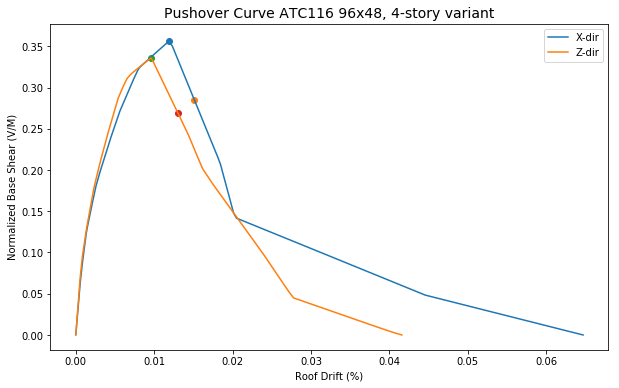

In [10]:
wt = np.loadtxt(os.path.join(cwd, *['BuildingInfo',BuildingList[0],'Loads','floorWeights.txt']))
SeismicWeight = np.sum(wt)

BaseDirectory = os.path.join(cwd, *['BuildingModels',BuildingList[0]])

PushoverX_rigid = epd.pushoverdata(BaseDirectory+ '\PushoverAnalysis\\', 'X', 'roof', SeismicWeight, numFloors)
PushoverResultsX_rigid = epd.extractpushoverpoints(PushoverX_rigid)

PushoverY_rigid = epd.pushoverdata(BaseDirectory+ '\PushoverAnalysis\\', 'Z', 'roof', SeismicWeight, numFloors)
PushoverResultsY_rigid = epd.extractpushoverpoints(PushoverY_rigid)

plt.figure(figsize = (10,6))
plt.plot(PushoverX_rigid[1],PushoverX_rigid[0],label = 'X-dir')
plt.plot(PushoverY_rigid[1],PushoverY_rigid[0],label = 'Z-dir')

plt.scatter(PushoverResultsX_rigid[1],PushoverResultsX_rigid[0])
plt.scatter(PushoverResultsX_rigid[2], 0.8*PushoverResultsX_rigid[0])

plt.scatter(PushoverResultsY_rigid[1],PushoverResultsY_rigid[0])
plt.scatter(PushoverResultsY_rigid[2], 0.8*PushoverResultsY_rigid[0])

plt.xlabel('Roof Drift (%)')
plt.ylabel('Normalized Base Shear (V/M)')
plt.title('Pushover Curve ATC116 96x48, 4-story variant', fontsize = 14)
plt.legend()

df = pd.DataFrame([PushoverResultsX_rigid, PushoverResultsY_rigid ], 
                  columns = ['Peak Strength', 'Drift at Peak', 'Drift at 80%Peak'],
                  index = ['X', 'Y'])
df.head()

## Post-processing Dyanmic Analysis results

Execute the following lines of only after all the dynamic analyses have been completed for all the hazard levels

In [ ]:
# NumGM = np.array([50, 47, 47, 48, 47])

# CollapseCriteria = 0.1
# DemolitionCriteria = 0.01

# HazardLevel = np.array([0.403, 0.975, 1.307, 1.676, 2.237])

# dynamicDirectory = os.path.join(cwd, *['BuildingModels',BuildingList[0],'DynamicAnalysis'])

# sdr = extractedps.ExtractSDR(dynamicDirectory, HazardLevel, NumGM, numFloors)
# rdr = extractedps.ExtractRDR(dynamicDirectory, HazardLevel, NumGM, NumStory)
# gmDirectory = r'C:\Users\Laxman\Desktop\Python Tool\BuildingModels\GM_sets\BoelterHall'
# PGA = extractedps.ExtractPGA(gmDirectory, HazardLevel, NumGM)
# pfa = extractedps.ExtractPFA(dynamicDirectory, HazardLevel, NumGM, NumStory, PGA, g = 386.4)


In [11]:
## for now I'm importing an example EDP data from another example for demonstration purposes
pfa = pd.read_csv(os.path.join(resultDirectory, 'PFA.csv'), header=None)
sdr = pd.read_csv(os.path.join(resultDirectory,'SDR.csv'), header=None)
rdr = pd.read_csv(os.path.join(resultDirectory,'RDR.csv'), header=None)

### preprocess input data for pelicun

In [15]:
index_name = []
median = []
log_std = []
#1-PFA-0-1
for stripe in pfa[0].unique():
    churn_df = pfa[pfa[0]==stripe]
    story_name = 0 
    for story in churn_df.columns:
        for uniq_dir in pfa[1].unique():
            if story >=3:
                story_name = story - 3
                index_name.append('%s-PFA-%s-%s'%(stripe, story_name, uniq_dir))
                median.append(pfa[(pfa[0]==stripe) & (pfa[1]==uniq_dir)][story].median())
                log_std.append(pfa[(pfa[0]==stripe) & (pfa[1]==uniq_dir)][story].std())
d = {
    'idx': index_name, 
    'median': median, 
    'log_std': log_std
}
df_pfa = pd.DataFrame(d)
df_pfa = df_pfa.set_index('idx')

## PID
index_name = []
median = []
log_std = []
#1-PID-0-1
for stripe in sdr[0].unique():
    churn_df = sdr[sdr[0]==stripe]
    story_name = 0 
    for story in churn_df.columns:
        for uniq_dir in sdr[1].unique():
            if story >=3:
                story_name = story - 2
                index_name.append('%s-PID-%s-%s'%(stripe, story_name, uniq_dir))
                median.append(sdr[(sdr[0]==stripe) & (sdr[1]==uniq_dir)][story].median())
                log_std.append(sdr[(sdr[0]==stripe) & (sdr[1]==uniq_dir)][story].std())
d = {
    'idx': index_name, 
    'median': median, 
    'log_std': log_std
}
df_sdr = pd.DataFrame(d)
df_sdr = df_sdr.set_index('idx')

## combine two dfs 
df_comb = pd.concat([df_pfa, df_sdr])
df_comb.head()

,log_std,median
idx,,
1-PFA-0-1,0.095756,0.148458
1-PFA-0-2,0.083856,0.146941
1-PFA-1-1,0.125878,0.227519
1-PFA-1-2,0.113289,0.210666
1-PFA-2-1,0.126647,0.231842


In [ ]:
#parameters
sample_size = 10000
delta_y = 0.0075
stripe = '3' # this is the hazard level

In [ ]:
# from pelicun.base import set_options, convert_to_MultiIndex
# from pelicun.assessment import Assessment

In [ ]:
# prepare demand input
raw_demands = convert_to_MultiIndex(df_comb, axis=0)
raw_demands.index.names = ['stripe','type','loc','dir']

# prepare the demand input for pelicun
stripe_demands = raw_demands.loc[stripe,:]

# units - - - - - - - - - - - - - - - - - - - - - - - -  
stripe_demands.insert(0, 'Units',"")
stripe_demands.loc['PFA','Units'] = 'g'
stripe_demands.loc['PID','Units'] = 'rad'

# distribution family  - - - - - - - - - - - - - - - - -  
stripe_demands.insert(1, 'Family',"")
stripe_demands['Family'] = 'lognormal'

# distribution parameters  - - - - - - - - - - - - - - -
stripe_demands.rename(columns = {'median': 'Theta_0'}, inplace=True)
stripe_demands.rename(columns = {'log_std': 'Theta_1'}, inplace=True)

# prepare a correlation matrix that represents perfect correlation
ndims = stripe_demands.shape[0]
demand_types = stripe_demands.index 

perfect_CORR = pd.DataFrame(
    np.ones((ndims, ndims)),
    columns = demand_types,
    index = demand_types)

# prepare additional fragility and consequence data ahead of time
cmp_marginals = pd.read_csv('CMP_marginals.csv', index_col=0)

# add missing data to P58 damage model
P58_data = PAL.get_default_data('fragility_DB_FEMA_P58_2nd')
cmp_list = cmp_marginals.index.unique().values[:-3]

# now take those components that are incomplete, and add the missing information
additional_fragility_db = P58_data.loc[cmp_list,:].loc[P58_data.loc[cmp_list,'Incomplete'] == 1].sort_index()

# D2022.013a, 023a, 023b - Heating, hot water piping and bracing
# dispersion values are missing, we use 0.5
additional_fragility_db.loc[['D.20.22.013a','D.20.22.023a','D.20.22.023b'],
                            [('LS1','Theta_1'),('LS2','Theta_1')]] = 0.5

# D2031.013b - Sanitary Waste piping
# dispersion values are missing, we use 0.5
additional_fragility_db.loc['D.20.31.013b',('LS1','Theta_1')] = 0.5

# D2061.013b - Steam piping
# dispersion values are missing, we use 0.5
additional_fragility_db.loc['D.20.61.013b',('LS1','Theta_1')] = 0.5

# D3031.013i - Chiller
# use a placeholder of 3.0|0.5
additional_fragility_db.loc['D.30.31.013i',('LS1','Theta_0')] = 3.0
additional_fragility_db.loc['D.30.31.013i',('LS1','Theta_1')] = 0.5

# D3031.023i - Cooling Tower
# use a placeholder of 3.0|0.5
additional_fragility_db.loc['D.30.31.023i',('LS1','Theta_0')] = 3.0
additional_fragility_db.loc['D.30.31.023i',('LS1','Theta_1')] = 0.5

# D3052.013i - Air Handling Unit
# use a placeholder of 3.0|0.5
additional_fragility_db.loc['D.30.52.013i',('LS1','Theta_0')] = 3.0
additional_fragility_db.loc['D.30.52.013i',('LS1','Theta_1')] = 0.5

# prepare the extra damage models for collapse and irreparable damage
additional_fragility_db.loc[
    'excessiveRID', [('Demand','Directional'),
                    ('Demand','Offset'),
                    ('Demand','Type'), 
                    ('Demand','Unit')]] = [1, 0, 'Residual Interstory Drift Ratio', 'rad']   

additional_fragility_db.loc[
    'excessiveRID', [('LS1','Family'),
                    ('LS1','Theta_0'),
                    ('LS1','Theta_1')]] = ['lognormal', 0.01, 0.3]   

additional_fragility_db.loc[
    'irreparable', [('Demand','Directional'),
                    ('Demand','Offset'),
                    ('Demand','Type'), 
                    ('Demand','Unit')]] = [1, 0, 'Peak Spectral Acceleration|1.13', 'g']   

additional_fragility_db.loc[
    'irreparable', ('LS1','Theta_0')] = 1e10

additional_fragility_db.loc[
    'collapse', [('Demand','Directional'),
                 ('Demand','Offset'),
                 ('Demand','Type'), 
                 ('Demand','Unit')]] = [1, 0, 'Peak Spectral Acceleration|1.13', 'g']   

additional_fragility_db.loc[
    'collapse', [('LS1','Family'),
                 ('LS1','Theta_0'),
                 ('LS1','Theta_1')]] = ['lognormal', 1.35, 0.5]  

# Now we can set the incomplete flag to 0 for these components
additional_fragility_db['Incomplete'] = 0

# create the additional consequence models
additional_consequences = pd.DataFrame(
    columns = pd.MultiIndex.from_tuples([
        ('Incomplete',''), ('Quantity','Unit'), ('DV', 'Unit'), ('DS1', 'Theta_0')]),
    index=pd.MultiIndex.from_tuples([
        ('replacement','Cost'), ('replacement','Time')])
)

additional_consequences.loc[('replacement', 'Cost')] = [0, '1 EA', 'USD_2011', 21600000]
additional_consequences.loc[('replacement', 'Time')] = [0, '1 EA', 'worker_day', 12500]

### Generate demand samples

In [ ]:
# initialize a pelicun Assessment
PAL = Assessment({"PrintLog": True, "Seed": 415,})

# load the demand model
PAL.demand.load_model({'marginals': stripe_demands,
                       'correlation': perfect_CORR})

# generate samples
PAL.demand.generate_sample({"SampleSize": sample_size})

# add residual drift and Sa
demand_sample = PAL.demand.save_sample()

RID = PAL.demand.estimate_RID(demand_sample['PID'], {'yield_drift': delta_y})
demand_sample_ext = pd.concat([demand_sample, RID], axis=1)

Sa_vals = [0.158, 0.387, 0.615, 0.843, 1.071, 1.299, 1.528, 1.756]
demand_sample_ext[('SA_1.13',0,1)] = Sa_vals[int(stripe)-1]

# add units to the data 
demand_sample_ext.T.insert(0, 'Units',"")

# PFA and SA are in "g" in this example, while PID and RID are "rad"
demand_sample_ext.loc['Units', ['PFA', 'SA_1.13']] = 'g'
demand_sample_ext.loc['Units',['PID', 'RID']] = 'rad'

PAL.demand.load_sample(demand_sample_ext)

### assess damages

In [ ]:
# specify number of stories
PAL.stories = 4

# load component definitions
cmp_marginals = pd.read_csv('CMP_marginals.csv', index_col=0)
PAL.asset.load_cmp_model({'marginals': cmp_marginals})

# generate sample
PAL.asset.generate_cmp_sample(sample_size)

# load the models into pelicun
PAL.damage.load_damage_model([
    additional_fragility_db,  # This is the extra fragility data we've just created
    'PelicunDefault/fragility_DB_FEMA_P58_2nd.csv' # and this is a table with the default P58 data    
])

# prescribe the damage process
dmg_process = {
    "1_collapse": {
        "DS1": "ALL_NA"
    },
    "2_excessiveRID": {
        "DS1": "irreparable_DS1"
    }
}

# calculate damages
PAL.damage.calculate(dmg_process=dmg_process)

### Losses

In [ ]:
# create the loss map
drivers = [f'DMG-{cmp}' for cmp in cmp_marginals.index.unique()]
drivers = drivers[:-3]+drivers[-2:]

loss_models = cmp_marginals.index.unique().tolist()[:-3] +['replacement',]*2

loss_map = pd.DataFrame(loss_models, columns=['BldgRepair'], index=drivers)

# load the loss model
PAL.bldg_repair.load_model(
    [additional_consequences,
     "PelicunDefault/bldg_repair_DB_FEMA_P58_2nd.csv"], 
    loss_map)

# perform the calculation
PAL.bldg_repair.calculate()

# get the aggregate losses
agg_DF = PAL.bldg_repair.aggregate_losses()

agg_DF.describe([0.1, 0.5, 0.9])